In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

In [3]:
import os
import json
from tqdm import tqdm_notebook

import numpy as np
import pandas as pd

from utils.process_rtog_nii import process_rtog_nii
from utils.mri_viewer import MRIViewer
import nibabel

In [4]:
from utils.mri_viewer import MRIViewerGifMultiple

# Run preprocessing

In [17]:
all_files = os.listdir("/local-scratch/marcthib_scratch/rtog")

In [18]:
all_flair = [s for s in all_files if ("flair" in s) and ("proc" not in s)]

In [19]:
all_patients = [s[:-9] for s in all_flair]

In [ ]:
for patient_str in tqdm_notebook(sorted(all_patients, key=lambda x:int(x))):
    if int(patient_str) <= 121:
        continue
    print("Pre-processing patient", patient_str)
    process_rtog_nii("/local-scratch/marcthib_scratch/rtog/", 
                     input_t1c_filename=patient_str + 't1c.nii', output_t1c_filename=patient_str + 't1c_proc.nii',
                     input_flair_filename=patient_str + 'flair.nii', output_flair_filename=patient_str + 'flair_proc.nii',)

Pre-processing patient 122
fsl_anat -i /local-scratch/marcthib_scratch/rtog/122t1c.nii -o /local-scratch/marcthib_scratch/rtog/tmp/T1 -t T1 --noreg --nononlinreg --noseg --nosubcortseg

fsl_anat -i /local-scratch/marcthib_scratch/rtog/122flair.nii -o /local-scratch/marcthib_scratch/rtog/tmp/T2 -t T2 --noreg --nononlinreg --noseg --nosubcortseg
bet /local-scratch/marcthib_scratch/rtog/t1c_fsl_anat.nii /local-scratch/marcthib_scratch/rtog/t1c_bet.nii -f 0.5 -g 0.0
bet /local-scratch/marcthib_scratch/rtog/flair_fsl_anat.nii /local-scratch/marcthib_scratch/rtog/flair_bet.nii -f 0.5 -g 0.0
reg_aladin -ref /local-scratch/marcthib_scratch/rtog/t1c_bet.nii.gz -flo /local-scratch/marcthib_scratch/rtog/flair_bet.nii.gz -aff /home/marcthib/research/rtog/rtog/reg.txt -res /local-scratch/marcthib_scratch/rtog/flair_reg_aladin.nii -rigOnly
Pre-processing patient 123
fsl_anat -i /local-scratch/marcthib_scratch/rtog/123t1c.nii -o /local-scratch/marcthib_scratch/rtog/tmp/T1 -t T1 --noreg --nononlinreg 

In [27]:
sorted(all_patients, key=lambda x:int(x))

['5',
 '6',
 '7',
 '16',
 '20',
 '21',
 '23',
 '25',
 '27',
 '29',
 '33',
 '35',
 '36',
 '37',
 '41',
 '42',
 '46',
 '47',
 '48',
 '52',
 '53',
 '54',
 '55',
 '56',
 '61',
 '80',
 '81',
 '85',
 '88',
 '89',
 '92',
 '99',
 '100',
 '101',
 '102',
 '105',
 '111',
 '113',
 '115',
 '118',
 '119',
 '121',
 '122',
 '123',
 '125',
 '129',
 '137',
 '138',
 '142',
 '144',
 '145',
 '146',
 '149',
 '150',
 '151',
 '153',
 '158',
 '160',
 '167',
 '168',
 '170',
 '173',
 '174',
 '177',
 '179',
 '180',
 '193',
 '195',
 '201',
 '202',
 '211',
 '214',
 '216',
 '218',
 '220',
 '222',
 '224',
 '226',
 '228',
 '230',
 '232',
 '233',
 '235',
 '236',
 '244',
 '245',
 '247',
 '259',
 '262',
 '269',
 '273',
 '274',
 '275',
 '278',
 '283',
 '284',
 '289',
 '293',
 '295',
 '306',
 '316',
 '318',
 '325',
 '326',
 '328',
 '329',
 '333',
 '335',
 '338',
 '351',
 '355',
 '358',
 '369',
 '374',
 '381',
 '386',
 '387',
 '389',
 '392',
 '393',
 '406',
 '414',
 '417',
 '424',
 '432',
 '438',
 '442',
 '454',
 '456',
 '4

Failed

In [23]:
121

121

Check preprocessing status

In [ ]:
sorted([int(s[:-14]) for s in sorted([f for f in all_files if "proc" in f])[::2]])

# Compare before and after pre-processing

In [42]:
from skimage.transform import resize
def resize_data_to_brats_size(data):
    # hardcoded for brats 2017
    shape_of_brats = (240, 240, 22)

    data_01 = (data - data.min()) / (data.max() - data.min())
    data_resized = resize(data_01, shape_of_brats, anti_aliasing=True)

    return data_resized


In [43]:
patient_number = 101
# scratch_folder = "/local-scratch/marcthib_scratch/rtog"
scratch_folder = "/local-scratch/rsub_scratch/rtog"

In [44]:
viewer_args = []

for image_definition in ['t1c', 'flair', 't1c_proc', 'flair_proc']:
    image_path = os.path.join(scratch_folder, str(patient_number) + image_definition + '.nii')
    nibabel_item = nibabel.load(image_path)
    image_data = nibabel_item.get_data()
    image_data[np.isnan(image_data)] = 0.
    # image_data = np.swapaxes(image_data, 0, 2)
    
    image_data = resize_data_to_brats_size(image_data)
    # reshape to align all (preproc) images which do not necessarily have the same shape
    viewer_args.append(image_data)

viewer_args.append(None)
for image_definition in ['t1c', 'flair', 't1c_proc', 'flair_proc']:
    viewer_args.append(image_definition)

/home/marcthib/miniconda3/envs/myenv/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<IPython.core.display.Javascript object>


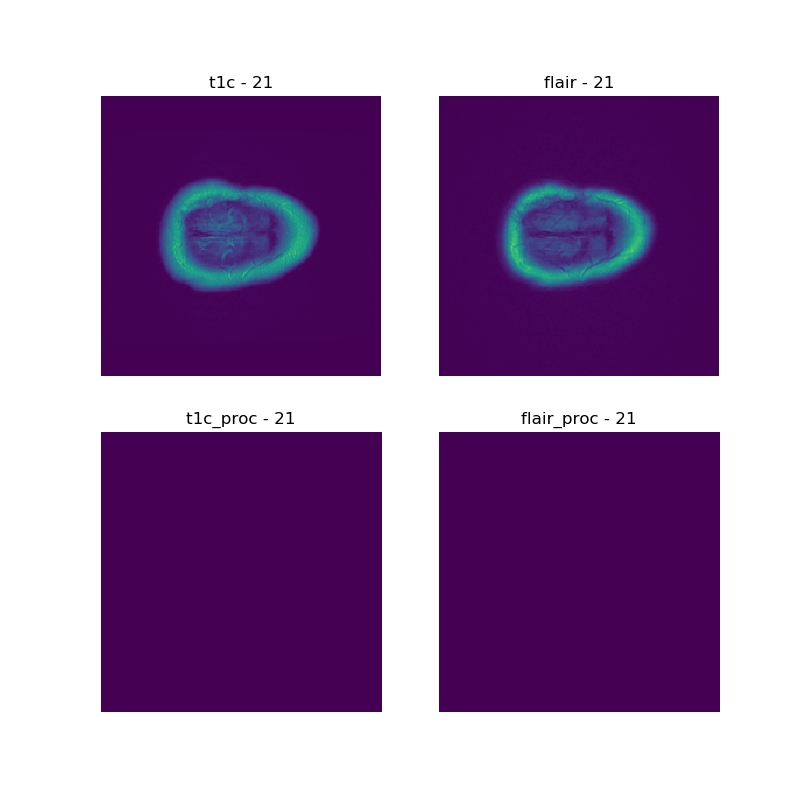

In [51]:
MRIViewerGifMultiple(viewer_args[:4], titles=viewer_args[-4:], ncols=2, nrows=2).view()

Test - visualize the imported .nii files

In [13]:
nii_path = "/local-scratch/marcthib_scratch/rtog_proc/out57546/23t1c_proc.nii"
image_data = nibabel.load(nii_path).get_data()
image_data[np.isnan(image_data)] = 0.

<IPython.core.display.Javascript object>


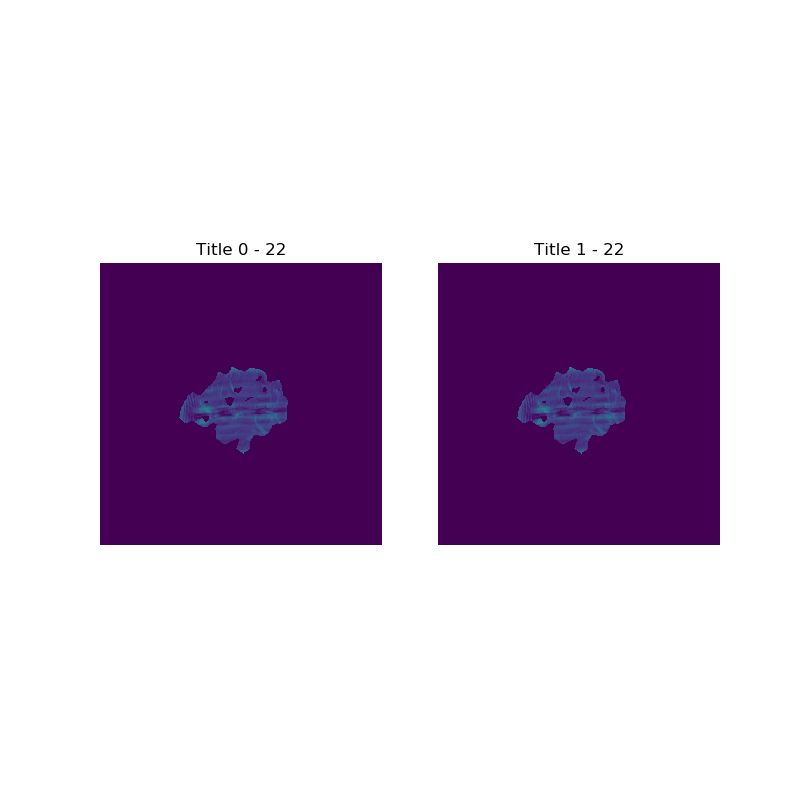

In [14]:
MRIViewerGifMultiple([image_data, image_data]).view()